# 第二次数学实验

## 1.求下列方程的根

### 1.1 求方程 $e^x - 3x = 0$ 在 $[-1, 1]$ 上的近似解

>**tips:** 对于该题，我们将分别依次使用**图像放大法**，**二分法**，**对应于MATLAB`fzero`函数的Python`optimize.root_scalar`库函数** 与 **对应于MATLAB`fsolve`函数的Python`optimize.root`库函数**四种方法求解。

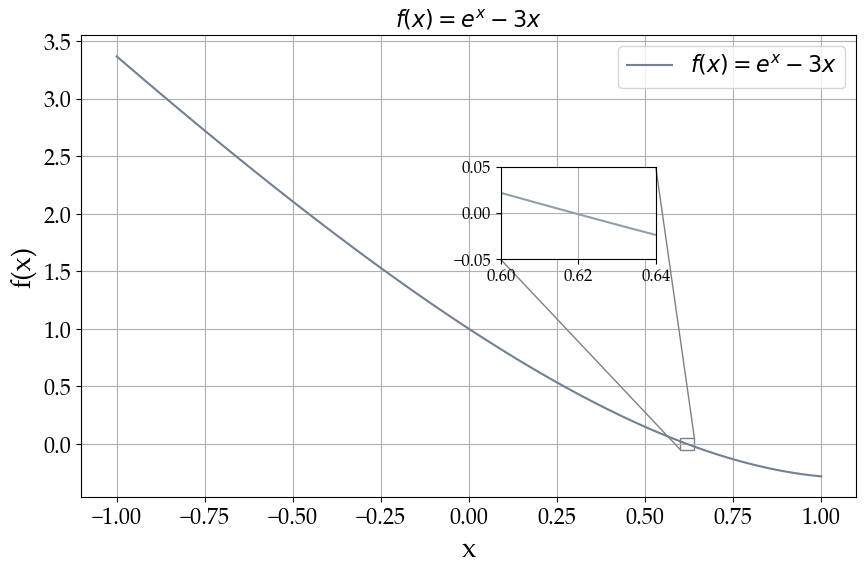

In [1]:
# 法一：图像放大法，初步确定根的大致位置

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

mpl.rcParams['font.family'] = 'Palatino Linotype'

def f(x):
    return np.exp(x) - 3 * x

x = np.linspace(-1, 1, 400)
y = f(x)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y, label=r'$f(x) = e^x - 3x$', color='#708194')

# 主图设置
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('f(x)', fontsize=20)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.set_title(r'$f(x) = e^x - 3x$', fontsize=16)
ax.legend(fontsize=16)
ax.grid(True)

# 创建放大区域，位置和大小通过参数调整
axins = inset_axes(ax, width="50%", height="50%", loc='lower right',
                   bbox_to_anchor=(0.35, 0.5, 0.4, 0.4),
                   bbox_transform=ax.transAxes)

# 在放大区域中绘制相同的函数
x_zoomed = np.linspace(0.5, 0.75, 400)
y_zoomed = f(x_zoomed)
axins.plot(x_zoomed, y_zoomed, color='#8ea0aa')
axins.grid(True)

# 设置放大区域的x轴和y轴限制
axins.set_xlim(0.6, 0.64)
axins.set_ylim(-0.05, 0.05)
axins.tick_params(axis='x', labelsize=12)
axins.tick_params(axis='y', labelsize=12)

# 添加放大区域和主图之间的连接线
mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="0.5")

plt.show()

>**note:** 根据图像放大可以初步确定根的位置大致在0.62附近

In [2]:
# 法二：二分法，特别适用于该题在指定区间内查找连续函数的根

import numpy as np

def f(x):
    return np.exp(x) - 3 * x

def bisection_method(f, a, b, tol=1e-6):
    if f(a) * f(b) > 0:
        raise ValueError("The function values at the end points must have opposite signs")
    while (b - a) / 2 > tol:
        midpoint = (a + b) / 2
        if f(midpoint) == 0:
            return midpoint
        elif f(a) * f(midpoint) < 0:
            b = midpoint
        else:
            a = midpoint
    return (a + b) / 2

a = -1
b = 1
root = bisection_method(f, a, b)
print(f"The root of the equation is approximately: {root:.3f}")

The root of the equation is approximately: 0.619


>**note:** 根据二分法计算结果，根的位置在0.619附近

In [3]:
# 法三：Python库`optimize.root_scalar`，提前给定区间，该函数可以直接找到函数的根

from scipy.optimize import root_scalar

def func(x):
    return np.exp(x) - 3 * x

solution = root_scalar(func, bracket=[-1, 1])
print('Root_scalar solution:', solution.root)

Root_scalar solution: 0.6190612867358729


In [4]:
# 法四：Python库`optimize.root`，提前给定猜测值，该函数可以直接找到函数的根

from scipy.optimize import root

def func(x):
    return np.exp(x) - 3 * x

solution = root(func, x0 = 0.6)
print('Root solution:', solution.x[0])

Root solution: 0.6190612867359417


#### 综上四种方法或独立实现或相互印证，均求得该方程 $e^x - 3x = 0$ 在 $[-1, 1]$ 上的近似解为 $0.619$

### 1.2 判定方程 $x^7 + 2x^5 + 3x^3 + 5x + 7 = 0$ 有几个实根

>**tips:** 对于该题，我们将分别依次使用**图像放大法**，**牛顿法**，**对应于MATLAB`roots`函数的Python`numpy.roots`库函数**，**对应于MATLAB`fzero`函数的Python`optimize.root_scalar`库函数**与 **对应于MATLAB`fsolve`函数的Python`optimize.root`库函数**五种方法实现。

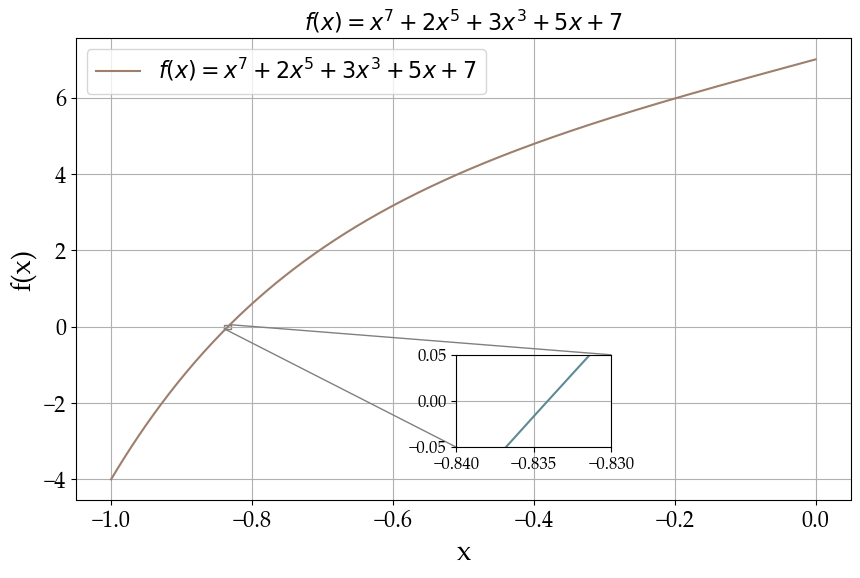

In [5]:
# 法一：图像放大法，初步确定根的个数

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

mpl.rcParams['font.family'] = 'Palatino Linotype'

def f(x):
    return x ** 7 + 2 * x ** 5 + 3 * x ** 3 + 5 * x + 7

x = np.linspace(-1, 0, 400)
y = f(x)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y, label=r'$f(x) = x^7 + 2x^5 + 3x^3 + 5x + 7$', color='#9d7f6d')

# 主图设置
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('f(x)', fontsize=20)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.set_title(r'$f(x) = x^7 + 2x^5 + 3x^3 + 5x + 7$', fontsize=16)
ax.legend(fontsize=16)
ax.grid(True)

# 创建放大区域，位置和大小通过参数调整
axins = inset_axes(ax, width="50%", height="50%", loc='lower right',
                   bbox_to_anchor=(0.3, 0.1, 0.4, 0.4),
                   bbox_transform=ax.transAxes)

# 在放大区域中绘制相同的函数
x_zoomed = np.linspace(-1, 0, 400)
y_zoomed = f(x_zoomed)
axins.plot(x_zoomed, y_zoomed, color='#5e8a96')
axins.grid(True)

# 设置放大区域的x轴和y轴限制
axins.set_xlim(-0.84, -0.83)
axins.set_ylim(-0.05, 0.05)
axins.tick_params(axis='x', labelsize=12)
axins.tick_params(axis='y', labelsize=12)

# 添加放大区域和主图之间的连接线
mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="0.5")

plt.show()

>**note:** 根据图像逐步放大可以初步确定根的个数为1，且该根在-0.835附近

In [6]:
# 法二：牛顿法，一种特殊的迭代法，快速逼近根的位置，适用于该题

import sympy as sp 

x = sp.symbols('x')

f = x ** 7 + 2 * x ** 5 + 3 * x ** 3 + 5 * x + 7
f_prime = sp.diff(f, x)

# 定义牛顿法的迭代函数
def newton_method(func, func_prime, initial_guess, tolerance=1e-6, max_iterations=100):
    xk = initial_guess
    for _ in range(max_iterations):
        xk_new = xk - func.subs(x, xk) / func_prime.subs(x, xk)
        if abs(xk_new - xk) < tolerance:
            return xk_new
        xk = xk_new
    return xk

initial_guess = -0.8
root = newton_method(f, f_prime, initial_guess)

print(f"The root of the equation is approximately: {root:.3f}")

The root of the equation is approximately: -0.834


>**note:** 根据牛顿法计算结果，根的位置在-0.834附近

In [7]:
# 法三：Python库`numpy.roots`，直接求解多项式的根

coefficients = [1, 0, 2, 0, 3, 0, 5, 7]
roots = np.roots(coefficients)

# 筛选实数根
real_roots = roots[np.isclose(roots.imag, 0)].real

# 打印实数根
print(f"The real roots of the equation are: {real_roots}")
print(f"Number of real roots: {len(real_roots)}")

The real roots of the equation are: [-0.83411353]
Number of real roots: 1


>**note:** 根据`numpy.roots`计算结果，实数根的个数为1，且该根在-0.834附近

In [8]:
# 法四：Python库`optimize.root_scalar`，提前给定区间，该函数可以直接找到函数的根

from scipy.optimize import root_scalar

def func(x):
    return x ** 7 + 2 * x ** 5 + 3 * x ** 3 + 5 * x + 7

solution = root_scalar(func, bracket=[-1, 0])
print('Root_scalar solution:', solution.root)

Root_scalar solution: -0.834113526113188


In [9]:
# 法五：Python库`optimize.root`，提前给定猜测值，该函数可以直接找到函数的根

from scipy.optimize import root

def func(x):
    return x ** 7 + 2 * x ** 5 + 3 * x ** 3 + 5 * x + 7

solution = root(func, x0 = -0.8)
print('Root solution:', solution.x[0])

Root solution: -0.834113526113188


#### 综上五种方法或独立实现或相互印证，都判定方程 $x^7 + 2x^5 + 3x^3 + 5x + 7 = 0$ 有一个实根且该根大致为 $-0.834$

## 2.求解线性方程组

$$
\begin{align*}
7x_1 + 2x_2 + x_3 - 2x_4 &= 4 \\
9x_1 + 15x_2 + 3x_3 - 2x_4 &= 7 \\
-2x_1 - 2x_2 + 11x_3 + 5x_4 &= -1 \\
x_1 + 3x_2 + 2x_3 + 13x_4 &= 0
\end{align*}
$$

In [10]:
A = np.array([[7, 2, 1, -2],
              [9, 15, 3, -2], 
              [-2, -2, 11, 5],
              [1, 3, 2, 13]])

b = np.array([4, 7, -1, 0])

solution = np.linalg.solve(A, b)
print(f"The solution to the equation is: {solution}")

The solution to the equation is: [ 0.49793125  0.14449395  0.06285805 -0.08131763]


### 通过代码求得的该线性方程组的解集为

\begin{aligned}
\begin{cases}
x_1 &= 0.498, \\
x_2 &= 0.144, \\
x_3 &= 0.063, \\
x_4 &= -0.081.
\end{cases}
\end{aligned}

## 3.求下列方程组的解，并说明结果是否和初始点的选择有关

>**tips:** 这两个方程组均属于非线性方程组，可以使用**数值方法**进行求解，常用的方法包括牛顿法和使用 `scipy.optimize` 库中的 `fsolve` 函数。此外为了研究结果是否与初始点的选择有关，我们可以多选择几个不同的初始点，建立求解器加以说明。

### 3.1 求解（3.1）方程组

$$
\begin{equation*}
\begin{cases}
2x_1 - x_2 = e^{-x_1} \\
-x_1 + 2x_2 = e^{-x_2}
\end{cases}
\tag{3.1}
\end{equation*}
$$

In [11]:
import numpy as np
from scipy.optimize import fsolve

def equations(p):
    x1, x2 = p
    return (2 * x1 - x2 - np.exp(-x1), -x1 + 2 * x2 - np.exp(-x2))

# 选择不同的初始点
initial_guesses = [(-5, -5), (5, 5), (0, 0), (-5, 5), (5, -5)]

# 用于记录解的列表
solutions = []

# 使用每个初始点运行求解器
for guess in initial_guesses:
    result = fsolve(equations, guess)
    solutions.append((result, guess))

print("Solution results with different initial guesses:")
for solution, guess in solutions:
    print(f"Initial guess: {guess} -> Solution: x1 = {solution[0]:.3f}, x2 = {solution[1]:.3f}")

Solution results with different initial guesses:
Initial guess: (-5, -5) -> Solution: x1 = 0.567, x2 = 0.567
Initial guess: (5, 5) -> Solution: x1 = 0.567, x2 = 0.567
Initial guess: (0, 0) -> Solution: x1 = 0.567, x2 = 0.567
Initial guess: (-5, 5) -> Solution: x1 = 0.567, x2 = 0.567
Initial guess: (5, -5) -> Solution: x1 = 0.567, x2 = 0.567


>**note:** 通过代码求解得到（3.1）方程组的两个解分别为 $ x1 = 0.567, x2 = 0.567 $，且发现结果与初始点的选择无关。

### 3.2 求解（3.2）方程组

$$
\begin{equation*}
\begin{cases}
x_1^2 - 5x_2^2 + 7x_3^2 = -12 \\
3x_1 x_2 + x_1 x_3 - 11x_1 = 0 \\
2x_2 x_3 + 40x_1 = 0
\end{cases}
\tag{3.2}
\end{equation*}
$$

In [12]:
def equations(p):
    x1, x2, x3 = p
    return (x1 ** 2 - 5 * x2 ** 2 + 7 * x3 ** 2 + 12,
            3 * x1 * x2 + x1 * x3 - 11 * x1,
            2 * x2 * x3 + 40 * x1)

# 选择不同的初始点
initial_guesses = [(1, 1, 1), (-1, -1, -1), (2, -1, 1), (-2, 2, -1)]

# 用于记录解的列表
solutions = []

# 使用每个初始点运行求解器
for guess in initial_guesses:
    result = fsolve(equations, guess)
    solutions.append((result, guess))

# 打印结果
print("Solution results with different initial guesses:")
for solution, guess in solutions:
    print(f"Initial guess: {guess} -> Solution: x1 = {solution[0]:.3f}, x2 = {solution[1]:.3f}, x3 = {solution[2]:.3f}")

Solution results with different initial guesses:
Initial guess: (1, 1, 1) -> Solution: x1 = -0.000, x2 = 1.549, x3 = 0.000
Initial guess: (-1, -1, -1) -> Solution: x1 = -0.000, x2 = -1.549, x3 = -0.000
Initial guess: (2, -1, 1) -> Solution: x1 = -0.000, x2 = -1.549, x3 = -0.000
Initial guess: (-2, 2, -1) -> Solution: x1 = 0.000, x2 = 1.549, x3 = -0.000


>**note:** 通过代码求得（3.2）方程组的三个解如上。值得注意的是：这些结果显示，该非线性方程组的解**显著受到**初始猜测值的影响，这表明该方程组**可能存在多个解**。因此我们意识到在数学建模解决实际问题时**选择合适初始猜测值**和进行**灵敏度分析**的重要性，以确保问题的有效性和得到有实际意义的解。

## 4.确定小行星绕太阳运行的轨道

**问题重述：** 基于提供的五个不同时间点的直角坐标系中的位置数据，建立模型来确定一颗小行星绕太阳运行的轨道，确定太阳的位置，同时绘制出小行星的运动轨迹。

**数据提供：** 一天文学家要确定一颗小行星绕太阳运行的轨道，他在轨道平面内建立以直角坐标系，其单位为天文测量单位，在5个不同的时间对小行星作了5次观察，测得轨道上5个点的坐标数据如下表：

|   | 1     | 2     | 3     | 4     | 5     |
|---|-------|-------|-------|-------|-------|
| x | 5.764 | 6.286 | 6.759 | 7.168 | 7.408 |
| y | 0.648 | 1.202 | 1.823 | 2.526 | 3.360 |

>**hint:** 假定小行星的轨道是一个椭圆，将椭圆的参数作为未知数，根据通过的5个点的坐标，建立非线性方程组，解出这些参数，使用fsolve可以求解

**具体实现步骤：**

1. **列出椭圆方程的一般形式**：椭圆的一般方程可以表示为 $\frac{(x-h)^2}{a^2} + \frac{(y-k)^2}{b^2} = 1$，其中 $(h,k)$ 是椭圆中心的坐标，$a$ 是椭圆的半长轴，$b$ 是椭圆的半短轴。对于一个轨道而言，太阳位于其中一个焦点上。

2. **确定方程参数**：我们需要确定椭圆方程的参数 $a, b, h, k$，且椭圆上的任意一点 $(x,y)$ 都满足上述椭圆方程。

3. **使用非线性方程求解**：这是一个典型的非线性最优化问题，通过给定的五个坐标点，我们可以建立一个包含五个非线性方程的方程组，用这些数据点来求解未知数 $a, b, h, k$。

4. **Python编程求解**：使用Python及其科学计算库，如`NumPy`和`SciPy`中的`fsolve`函数来求解该非线性方程组。

5. **绘制轨迹和太阳的位置**：一旦我们得到了椭圆的参数，我们就可以使用这些参数来绘制小行星的轨道。同时，根据焦点和中心的关系计算太阳的位置，并将其标记在图中。

>**notice:** 由于有四个未知数但给了五组数据，为了避免系统的过度确定，故我们选择前四组数据进行方程组的求解，最后一组数据进行方程组的检验。

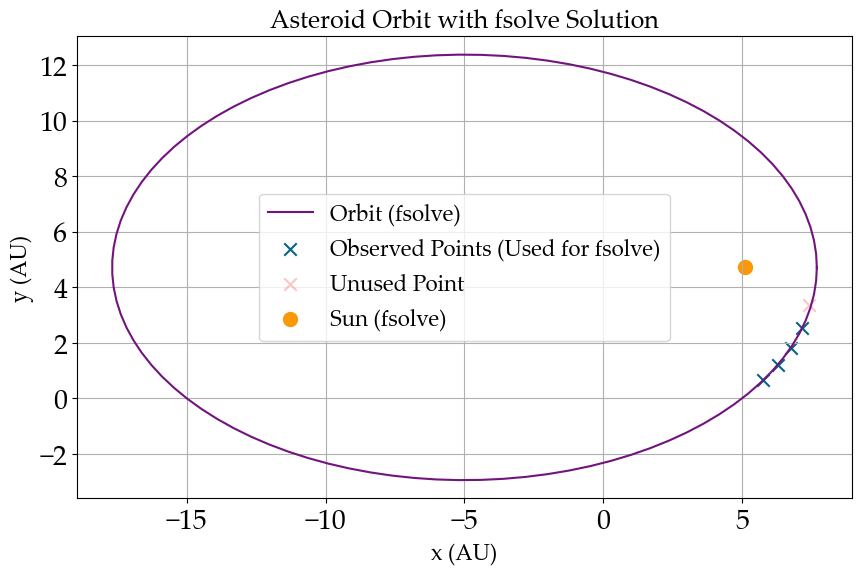

In [13]:
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['font.family'] = 'Palatino Linotype'

# 给定的观测数据点
x = np.array([5.764, 6.286, 6.759, 7.168, 7.408])
y = np.array([0.648, 1.202, 1.823, 2.526, 3.360])

# 使用前四个点重新定义方程组
def equations_for_fsolve(p):
    a, b, h, k = p
    eqs = [((x[i] - h)**2 / a**2) + ((y[i] - k)**2 / b**2) - 1 for i in range(4)]
    return eqs

# 初始猜测值
initial_guess = [1, 1, 6, 2]

# 使用fsolve求解
a, b, h, k = fsolve(equations_for_fsolve, initial_guess)

# 计算焦距c，并确定太阳的位置
c = np.sqrt(a**2 - b**2)
sun_position_fsolve = (h + c, k)

# 绘制轨道
theta_fsolve = np.linspace(0, 2*np.pi, 100)
ellipse_x_fsolve = h + a * np.cos(theta_fsolve)
ellipse_y_fsolve = k + b * np.sin(theta_fsolve)

plt.figure(figsize=(10, 6))
plt.plot(ellipse_x_fsolve, ellipse_y_fsolve,color = '#72147e', label='Orbit (fsolve)')
plt.scatter(x[:4], y[:4], color='#056682', marker='x', s=80, label='Observed Points (Used for fsolve)')
plt.scatter(x[4:], y[4:], color='#f39189', marker='x', s=80, label='Unused Point', alpha=0.5)
plt.scatter(sun_position_fsolve[0], sun_position_fsolve[1], color='#fa9905', marker='o', s=100, label='Sun (fsolve)')
plt.xlabel('x (AU)', fontsize=16)
plt.ylabel('y (AU)', fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Asteroid Orbit with fsolve Solution', fontsize=18)
plt.legend(fontsize=16)
plt.grid(True)
plt.axis('equal')
plt.show()

## 5.计算等式约束问题

**最小化函数:**

$$ f(x_1, x_2, x_3, x_4) = (x_1 + x_2)^2 + (2x_1 + x_4)^2 + (x_3 + 2x_2)^2 + (x_2 - x_4)^2 $$

**受以下约束:**

1. $ x_1 + x_2 + x_3 + x_4 = 1 $
2. $ x_1^2 + x_2^2 + x_3^2 + x_4^2 = 1 $

>**hint:** 先写出问题的Lagrange函数，该函数对所有变量和lagrange乘子的偏导数等于0，这样得出六个未知数和两个变量的方程，利用fsolve求解即可

**具体实现步骤:**

我们首先结合给定的目标函数和约束条件构造拉格朗日函数（Lagrangian）

拉格朗日函数 $L$，加入拉格朗日乘子 $\lambda_1$ 和 $\lambda_2$，为:

$$ L(x_1, x_2, x_3, x_4, \lambda_1, \lambda_2) = (x_1 + x_2)^2 + (2x_1 + x_4)^2 + (x_3 + 2x_2)^2 + (x_2 - x_4)^2 + \lambda_1(x_1 + x_2 + x_3 + x_4 - 1) + \lambda_2(x_1^2 + x_2^2 + x_3^2 + x_4^2 - 1) $$

接着我们需要找到该函数对于每个变量 $x_1, x_2, x_3, x_4$ 和拉格朗日乘子 $\lambda_1, \lambda_2$ 的偏导数，并将它们设置为0来求解该系统的驻点。

我们将得到6个方程：

\begin{align}
\frac{\partial L}{\partial x_1} &= 2(x_1 + x_2) + 4(2x_1 + x_4) + \lambda_1 + 2\lambda_2x_1 = 0 \tag{5.1} \\
\frac{\partial L}{\partial x_2} &= 2(x_1 + x_2) + 4(x_3 + 2x_2) + 2(x_2 - x_4) + \lambda_1 + 2\lambda_2x_2 = 0 \tag{5.2} \\
\frac{\partial L}{\partial x_3} &= 2(x_3 + 2x_2) + \lambda_1 + 2\lambda_2x_3 = 0 \tag{5.3} \\
\frac{\partial L}{\partial x_4} &= 4(2x_1 + x_4) - 2(x_2 - x_4) + \lambda_1 + 2\lambda_2x_4 = 0 \tag{5.4} \\
\frac{\partial L}{\partial \lambda_1} &= x_1 + x_2 + x_3 + x_4 - 1 = 0 \tag{5.5} \\
\frac{\partial L}{\partial \lambda_2} &= x_1^2 + x_2^2 + x_3^2 + x_4^2 - 1 = 0 \tag{5.6}
\end{align}

最后用Python编写代码进行具体求解

In [14]:
from scipy.optimize import fsolve
import numpy as np

# 定义拉格朗日函数的偏导数
def equations(vars):
    x1, x2, x3, x4, λ1, λ2 = vars
    f1 = 2*(x1 + x2) + 4*(2*x1 + x4) + λ1 + 2*λ2*x1
    f2 = 2*(x1 + x2) + 4*(x3 + 2*x2) + 2*(x2 - x4) + λ1 + 2*λ2*x2
    f3 = 2*(x3 + 2*x2) + λ1 + 2*λ2*x3
    f4 = 4*(2*x1 + x4) - 2*(x2 - x4) + λ1 + 2*λ2*x4
    f5 = x1 + x2 + x3 + x4 - 1
    f6 = x1**2 + x2**2 + x3**2 + x4**2 - 1
    return [f1, f2, f3, f4, f5, f6]

# 初始猜测
initial_guess = [0, 0, 0, 0, 0, 0]

# 使用fsolve求解方程组
solution = fsolve(equations, initial_guess)

# 打印结果
print(f"The solution to the equation is: {solution}")

The solution to the equation is: [ 0.22718789 -0.17317087  0.95825205 -0.01226907 -2.07927751  0.44636319]


通过编写并运行代码，我们得到驻点的值为：

- $x_1 = 0.227$
- $x_2 = -0.173$
- $x_3 = 0.958$
- $x_4 = -0.012$
- $\lambda_1 = -2.079$
- $\lambda_2 = 0.446$

这表明在满足给定的约束条件下，这一组值是该问题的一个可能驻点。

## 6.建模实践：探究垂直上升过程中的火箭运动状况

### 问题重述
假设单位时间喷射气体质量为 $m$，喷射速度为 $v$，初始重量为 $M$，考虑空气阻力与速度成正比，比例系数为 $0.2$，该问题要求结合在网上查阅到的长征三号乙的数据来分析一枚火箭（以长征三号乙的数据为例）在垂直向上发射时的动力学行为。

### 假设 

实际研究火箭的运动状况会非常复杂，涉及到繁琐的数学与物理定理与公式，为了简化该模型，我们做了以下假设：

1. **简化为一维运动**：假设火箭仅沿着垂直方向运动，忽略任何水平方向的运动或旋转。
2. **恒定喷射速度**：假设单位时间内喷射气体的速度 $v$ 是恒定的，不随时间或火箭速度变化。
3. **恒定喷射质量率**：假设单位时间内喷射的气体质量 $m$ 是恒定的，即燃料消耗率是恒定的。
4. **忽略外力影响**：除了考虑空气阻力外，忽略其他所有外力，如风力等。
5. **简化空气阻力模型**：假设空气阻力与火箭速度成正比，实际上空气阻力可能会随速度的不同而呈非线性变化。
6. **忽略重力变化**：假设地球的重力加速度 $g$ 在火箭运行高度内是恒定的，实际上 $g$ 会随着离地面高度的增加而略有减小。

### 符号与数据

该模型所涉及的符号与数据整理如下

| 符号 | 描述                           | 数值      | 单位       | 数据来源                                               |
|------|------------------------------|-----------|------------|---------------------------------------------------------|
| $M$ | 火箭初始总质量                 | $426,000$   | $kg$         | [维基百科](https://zh.wikipedia.org/wiki/%E9%95%BF%E5%BE%81%E4%B8%89%E5%8F%B7%E4%B9%99%E8%BF%90%E8%BD%BD%E7%81%AB%E7%AE%AD) |
| $m$ | 单位时间内喷射气体的质量           | $1,158.02$  | $kg/s$       | 同上                                                    |
| $v$ | 喷射速度                        | $2,557.47$  | $m/s$        | 同上                                                    |
| $k$ | 空气阻力系数                    | $0.2$       | $1/s$        | 题干                                                    |
| $x_0$ | 火箭的初始位置                 | $0$         | $m$          | 假设                                                    |
| $v_{\text{rocket},0}$ | 火箭的初始速度               | $0$         | $m/s$        | 假设                                                    |

### 模型建立步骤

#### 步骤1：定义问题参数

1. **火箭初始质量** $M$: 包括火箭自身的质量加上燃料的总质量。
2. **单位时间喷射气体的质量** $m$: 每秒钟喷射的气体质量。
3. **喷射速度** $v$: 气体相对于火箭的喷射速度。
4. **空气阻力系数** $k = 0.2\ \text{s}^{-1}$: 空气阻力与速度成正比的比例常数。

#### 步骤2：应用动力学原理

1. **推力计算**：火箭的推力$F_{\text{thrust}}$可以通过喷射的气体质量和喷射速度计算得到，$F_{\text{thrust}} = m \times v = 2961600N$。
2. **空气阻力计算**：空气阻力$F_{\text{drag}}$与火箭速度$v_{\text{rocket}}$成正比，$F_{\text{drag}} = k \times v_{\text{rocket}} = 511.494N$。
3. **火箭的净受力**：火箭受到的净力等于推力减去空气阻力，$F_{\text{net}} = F_{\text{thrust}} - F_{\text{drag}} = 2961088.506N$。

#### 步骤3：建立火箭运动方程

使用牛顿第二定律，$F = ma$，其中$a$是加速度，可以得到火箭的加速度表达式。因为**火箭的质量会随时间变化**，我们需要使用**变质量系统的动力学方程**来描述其运动，即

$$ a = \frac{dv_{\text{rocket}}}{dt} = \frac{F_{\text{net}}}{M(t)} $$

这里，基于先前燃料以恒定速率消耗的假设，$M(t)$是随时间变化的火箭质量，可以表示为$M(t) = M - m \times t$。

#### 步骤4：选择数值求解方法

由于火箭的动力学方程可能没有简单的解析解，故我们选择使用**数值方法**求解这个问题。具体来说，我们将采用龙格-库塔方法（RK4）来求解火箭速度 $v_{\text{rocket}}(t)$ 和位置 $x(t)$ 随时间 $t$ 的变化。

#### 步骤5：代码实现模型求解及可视化

编写Python代码来实际求解该模型并可视化火箭速度 $v_{\text{rocket}}(t)$ 和位置 $x(t)$ 随时间 $t$ 的变化，具体代码如下：

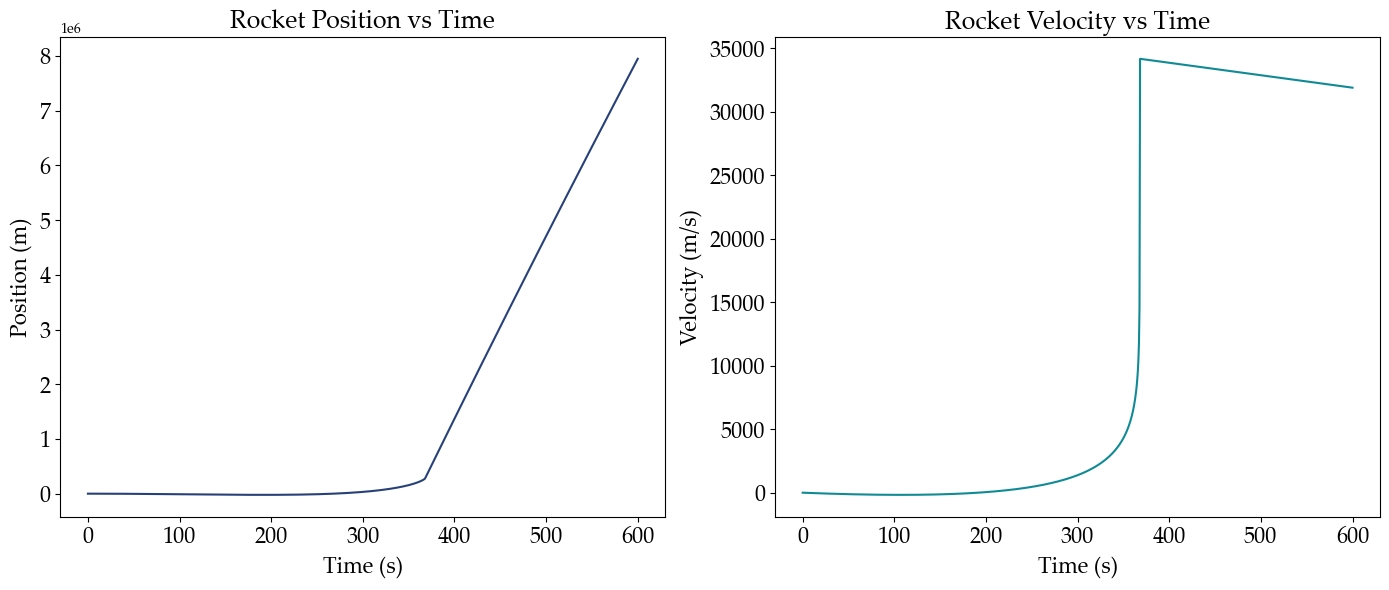

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import matplotlib as mpl

mpl.rcParams['font.family'] = 'Palatino Linotype'

# 使用收集到的数据来定义常数
M = 426000  # 火箭初始总质量，单位kg
m = 1158.02  # 单位时间喷射气体的质量，单位kg/s
v = 2557.47  # 喷射速度，单位m/s
k = 0.2  # 空气阻力系数，单位1/s
g = 9.81  # 重力加速度，单位m/s^2

# 定义动力学方程
def rocket_dynamics(t, y):
    x, v_rocket = y
    M_t = M - m * t if M - m*t > 0 else 0  # 随时间变化的火箭质量
    F_thrust = m * v if M_t > 0 else 0  # 推力
    F_drag = k * v_rocket  # 空气阻力
    F_net = F_thrust - F_drag - M_t * g  # 净受力
    a = F_net / M_t if M_t > 0 else -g  # 加速度
    return [v_rocket, a]

# 时间区间和初始条件
t_span = (0, 600)  # 时间区间，从0到600秒
y0 = [0, 0]  # 初始位置和速度
t_eval = np.linspace(*t_span, 1000)  # 时间点

# 解常微分方程
sol = solve_ivp(rocket_dynamics, t_span, y0, t_eval=t_eval, method='RK45')

# 绘制图表
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(sol.t, sol.y[0], color='#274178')
plt.title('Rocket Position vs Time', fontsize=18)
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('Position (m)', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1, 2, 2)
plt.plot(sol.t, sol.y[1], color='#108B96')
plt.title('Rocket Velocity vs Time', fontsize=18)
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('Velocity (m/s)', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.tight_layout()
plt.show()

### 结果及分析

从上面的模型求解与可视化图形中，我们可以观察到以下火箭运动的关键特征：

- **火箭位置随时间的变化**：火箭从静止开始加速上升，随着时间的增加，其位置先是缓慢爬升后突然急速上升。
- **火箭速度随时间的变化**：火箭的速度先是平稳增加后急速上升，随后速度开始减缓，但最终趋于稳定。这个趋于稳定的过程反映了推力减少（燃料耗尽）和空气阻力以及重力的综合作用。

### 模型优缺点分析

#### 模型优点

1. **通过合理假设来简化处理**：通过将问题简化为一维运动，并假设喷射速度和喷射质量率恒定，使得模型易于理解和实现。
2. **考虑了空气阻力**：模型通过引入空气阻力系数考虑了空气阻力的影响，使得结果更贴近实际情况。
3. **适用于初步分析**：这个模型适用于对火箭运动进行初步分析和教学目的，能够较好地反映火箭运动的基本特征。

#### 模型缺点

1. **高度变化对推力的影响未考虑**：在真实情况下，随着火箭升高，外部气压下降，对火箭喷口的有效推力会有所影响。
2. **未考虑多级火箭**：多级火箭在不同阶段会有不同的质量和推力，本模型未考虑这种情况。